# **Music Recommendation System**
- Final Solution Notebook

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Recommendation Systems/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
#Check data sets for missing values
print(count_df.isnull().sum())
print(song_df.isnull().sum())

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64
song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64


In [ ]:
#Show rows from song_df set with missing 'title' and 'release' values
missing_titles = song_df[song_df['title'].isna()]
missing_release = song_df[song_df['release'].isna()]
display(missing_titles)
display(missing_release)

,song_id,title,release,artist_name,year
64262,SOVICLT12A58A7C4D0,NaN,Of Flies And Men,Milton,0
114672,SOAGRAA12AB018D567,NaN,Puce de luxe,Sébastien Roch,0
229353,SOOAFJX12AB018A028,NaN,Puce de luxe,Sébastien Roch,0
264639,SOLDTFD12AB018AFE6,NaN,Puce de luxe,Sébastien Roch,0
458083,SOAUTVB12AB018AFF0,NaN,Puce de luxe,Sébastien Roch,0
557125,SOMPGYE12AB018AFE0,NaN,Puce de luxe,Sébastien Roch,0
578241,SOVHAZH12AB018D5B3,NaN,Puce de luxe,Sébastien Roch,0
652287,SOECGBQ12AB018D582,NaN,Puce de luxe,Sébastien Roch,0
697789,SOTJWHR12AB018D5A0,NaN,Puce de luxe,Sébastien Roch,0
697813,SOBDDHR12AB01888A6,NaN,Grand Glam Outtakes,Remute,0


,song_id,title,release,artist_name,year
138011,SOOBGAQ12A6D4F6762,Solitude,NaN,Metro,0
197822,SOGFJER12A6D4F675F,All The Beautiful People,NaN,Metro,0
223019,SOAFJBH12A6D4F6765,Down The Aisles,NaN,Metro,0
693232,SOCKQGJ12A6D4F6768,Provincial,NaN,Metro,0
841107,SOSQKYC12A6D4F6763,Middlemen,NaN,Metro,0


#### **Observations and Insights:**
- There is numerical and categorical data in both dataframes.   
- There are 15 missing 'titles' and 5 missing 'release' obervations.  Most of the missing titles are from the same ablum: Puce de luxe by Sebastien Roch.  They should not have a significant impact on our data so we will drop them.


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
df = count_df.merge(song_df, how = "left", on = "song_id").drop_duplicates()
# Drop the column 'Unnamed: 0'
print(df.shape)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
# Drop missing values from above search
df.dropna()
print(df.shape)


(2054534, 8)
(2054534, 7)


In [ ]:
print(df.isnull().sum())

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
play_count,2054534.0,3.038972,6.576965,1.0,1.0,1.0,3.0,2213.0
year,2054534.0,1633.598626,774.758474,0.0,1984.0,2002.0,2007.0,2010.0


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
# Import label encoder
from sklearn import preprocessing
  
# label_encoder reads nonnumeric labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['user_id']= label_encoder.fit_transform(df['user_id'])
df['song_id']= label_encoder.fit_transform(df['song_id'])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
print(df.describe().T)
print(df.shape)
print('There are ', df.user_id.nunique(), "unique user id's.")
print('There are ', df.song_id.nunique(), "unique song id's.")

                count          mean           std  min      25%      50%  \
user_id     2054534.0  38134.661889  22044.764724  0.0  19109.0  37947.0   
song_id     2054534.0   4976.886980   2888.537703  0.0   2434.0   5031.0   
play_count  2054534.0      3.038972      6.576965  1.0      1.0      1.0   
year        2054534.0   1633.598626    774.758474  0.0   1984.0   2002.0   

                75%      max  
user_id     57136.0  76352.0  
song_id      7522.0   9999.0  
play_count      3.0   2213.0  
year         2007.0   2010.0  
(2054534, 7)
There are  76353 unique user id's.
There are  10000 unique song id's.


**Univariate Analysis on numerical variables**
- The categorical variables are title, release, and artist_name.  User_iD and Song_id are categorical as well but have been encoded with numerical values.

user_id
Skew : 0.01


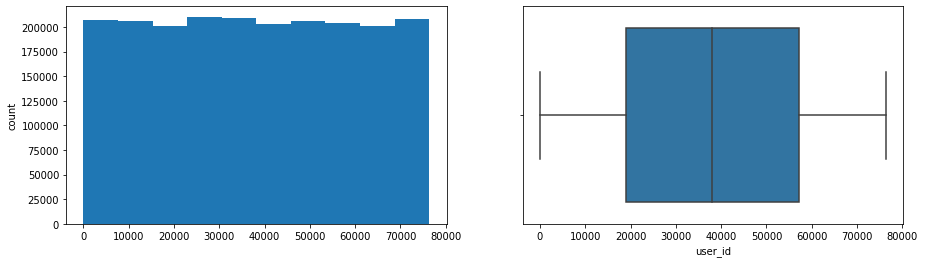

song_id
Skew : -0.03


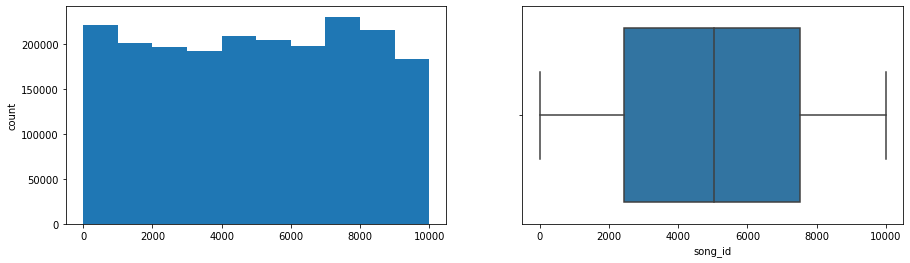

play_count
Skew : 38.15


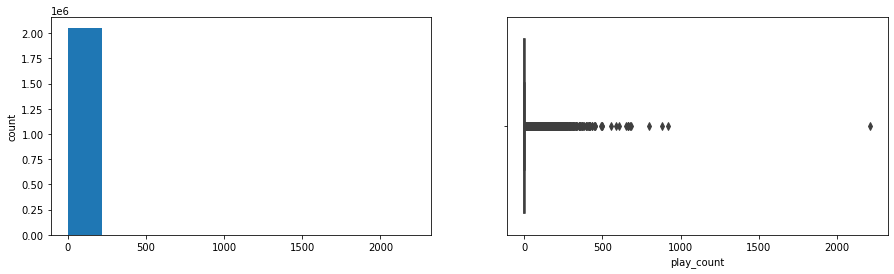

year
Skew : -1.63


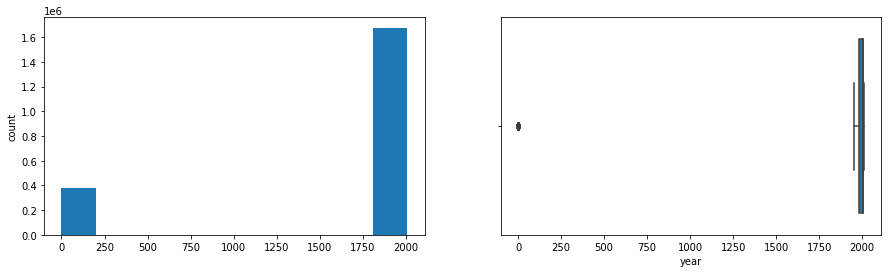

In [ ]:
for col in ['user_id', 'song_id', 'play_count', 'year']:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1,2,1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.show()

- The user_id and song_id columns are very uniformly distributed, which is to be expected as they were assigned numerical values in increasing order.
- There is some very heavy rightward skew on play_count, indicating some users played certain songs an unusually large number of times.
- Ther is some leftward skew on the release year, with the earliest release year being before 250 AD; this is likely a mistake. 

In [ ]:
#Check number of observations are listed for 'year' = 0.
print(df.groupby('year')['play_count'].sum().sort_values(ascending=False).head(5))


year
0       1257440
2009     552916
2008     500262
2007     451004
2006     379487
Name: play_count, dtype: int64


There is a large number of observations whose 'year' is listed as 0. 

In [ ]:
#Counting the number of observations with year listed as "0"
year_0 = df[df['year'] == 0]
print(len(year_0))
print('The percentage of observations with year listed as "0" is:', len(year_0) / len(df['year']) * 100)

377224
The percentage of observations with year listed as "0" is: 18.360562541189392


There are 377,244 observations with the year listed as "0", which accounts for ~18% of all observations.  This is a significant chunk of our data and limits our ability to analyze data using time (album release year) as a feature. 

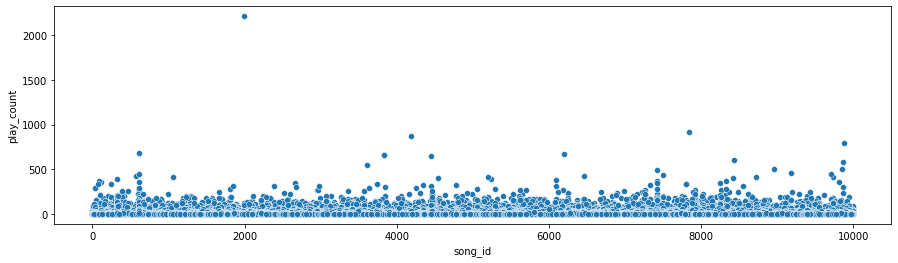

In [ ]:
# Scatter plot of original lables
plt.figure(figsize = (15, 4))

sns.scatterplot(x = 'song_id', y = 'play_count', data = df)

plt.show()

As expected there is no obvious relationship between the randomly assigned song_id # and the play_count, but we can see some that are extreme outliers.

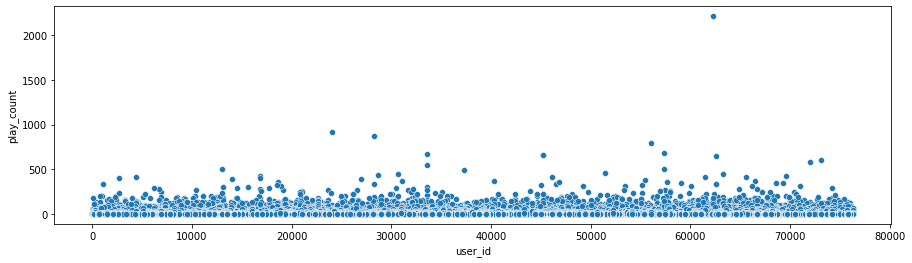

In [ ]:
plt.figure(figsize = (15, 4))
sns.scatterplot(x = 'user_id', y = 'play_count', data = df)
plt.show()

Also as expected there is no obvious relationship between the randomly assigned user_id # and the play_count, but once again we see some users that play certain songs a very large number of times.

In [ ]:
print(df.groupby('title')['play_count'].sum().sort_values(ascending=False).head(5))
print('---------------------------------------------------------------------')
print(df.groupby('release')['play_count'].sum().sort_values(ascending=False).head(5))
print('---------------------------------------------------------------------')
print(df.groupby('artist_name')['play_count'].sum().sort_values(ascending=False).head(5))


title
You're The One                                                         54915
Undo                                                                   49253
Revelry                                                                41418
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    31153
Sehr kosmisch                                                          31036
Name: play_count, dtype: int64
---------------------------------------------------------------------
release
If There Was A Way    54136
Greatest Hits         51536
Vespertine Live       49652
Only By The Night     46811
My Worlds             38094
Name: play_count, dtype: int64
---------------------------------------------------------------------
artist_name
Kings Of Leon             80726
Coldplay                  78386
Florence + The Machine    60066
Dwight Yoakam             54136
Björk                     53814
Name: play_count, dtype: int64


Above we can see the top 5 played titles, the top 5 played albums, and the top 5 played artists.  
- "You're The One" is the most played song by over 5000 plays.
- "If There Was a Way" is the top played album by ~2500 plays.
- "Kings of Leon" is the most played artist by over 2000 plays.

In [ ]:
#Check the play_counts to see which songs are overplayed by certain users.
df.sort_values(by='play_count', ascending = False).head(20)

,user_id,song_id,play_count,title,release,artist_name,year
1281460,62305,1990,2213,Starshine,Gorillaz,Gorillaz,2000
1093585,24069,7839,920,Crack Under Pressure,Stress related / Live and learn,Righteous Pigs,1998
1655772,28243,4186,879,Call It Off (Album Version),The Con,Tegan And Sara,2007
32515,56007,9882,796,Paradise & Dreams,Skydivin',Darren Styles,0
1956557,57320,614,683,You're The One,If There Was A Way,Dwight Yoakam,1990
1716420,33537,6201,676,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009
1807166,45183,3833,664,Dance_ Dance,Essential Bands,Fall Out Boy,0
1807165,45183,3833,664,Dance_ Dance,From Under The Cork Tree Limited Tour Edition,Fall Out Boy,0
1807164,45183,3833,664,Dance_ Dance,Dance_ Dance,Fall Out Boy,0
1434331,62589,4456,649,Reelin' In The Years,The Definitive Collection,Steely Dan,1972


The sort above revealed that song called "Dance_Dance" appears to have 2 duplicates under different release names.  Let's check for more.

In [ ]:
#Checking for duplicates with different release names:
print(df.shape)
print(df[df.duplicated(subset=['user_id','song_id','play_count','title'], keep=False)].sort_values(by='play_count', ascending = False).head(10))
print(df.shape)

(2054534, 7)
         user_id  song_id  play_count                title  \
1807166    45183     3833         664         Dance_ Dance   
1807164    45183     3833         664         Dance_ Dance   
1807165    45183     3833         664         Dance_ Dance   
1434339    62589     7796         333           Love Story   
1434340    62589     7796         333           Love Story   
1695806     3237     7796         155           Love Story   
1695805     3237     7796         155           Love Story   
1695838     3237     8582         150         Use Somebody   
1695839     3237     8582         150         Use Somebody   
502346     70446     3286         142  Message In A Bottle   

                                               release    artist_name  year  
1807166                                Essential Bands   Fall Out Boy     0  
1807164                                   Dance_ Dance   Fall Out Boy     0  
1807165  From Under The Cork Tree Limited Tour Edition   Fall Out Boy 

Apparently a significant number of these obervations are duplicates with different release values that were not dropped in the earlier "drop_duplicates".  This is distorting the popularity of these songs (#times played) and also the user's number of songs played.  We will drop duplicates again, specifically when the user_id, song_id, and play_count value, and title are all equal. 

In [ ]:
df = df.drop_duplicates(subset=['user_id','song_id','play_count','title'], keep='last')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2011927.0,38135.624918,22044.690553,0.0,19112.0,37948.0,57136.0,76352.0
song_id,2011927.0,4967.983732,2890.247181,0.0,2425.0,5023.0,7500.0,9999.0
play_count,2011927.0,3.044031,6.571101,1.0,1.0,1.0,3.0,2213.0
year,2011927.0,1631.209197,776.662284,0.0,1984.0,2002.0,2007.0,2010.0


In [ ]:
df.shape

(2011927, 7)

As you can see above, this has reduced our number of observations by over 40,000.

**Bivariate Analysis**

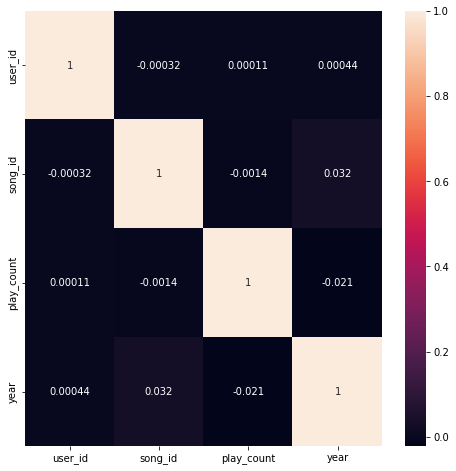

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

There does not seem to be a significant correlation amongst any of the numerical features of our data set.

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened to at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our songs to be listened to by at least 120 users to be considered
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
often_played = df_final[df_final['play_count'] > 5]
highplays = often_played.groupby('song_id')['play_count'].max().sort_values(ascending=False)
df_highplays= pd.DataFrame(highplays)
#df_highplays.play_count.sum()
df_highplays.head(5)

,play_count
song_id,
4545,405
614,271
97,215
5399,206
7416,194


**We can see that some users play certain songs hundreds of times, and so perhaps this data should be excluded as it skews the datas

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final.drop(df_final[df_final['play_count'] > 5].index)

In [ ]:
# Check the shape of the data
print(df_final.isnull().sum())
print("---------------------------------------")
print("The shape of the final dataset is", df_final.shape[0], "rows by ", df_final.shape[1], "columns.")
print("---------------------------------------")
print(df_final.head())

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64
---------------------------------------
The shape of the final dataset is 121904 rows by  7 columns.
---------------------------------------
     user_id  song_id  play_count                            title  \
209     6958      447           1               Daisy And Prudence   
211     6958      512           1  The Ballad of Michael Valentine   
212     6958      549           1        I Stand Corrected (Album)   
213     6958      703           1            They Might Follow You   
214     6958      719           1                       Monkey Man   

                  release      artist_name  year  
209          Distillation     Erin McKeown  2000  
211               Sawdust      The Killers  2004  
212       Vampire Weekend  Vampire Weekend  2007  
213           Tiny Vipers      Tiny Vipers  2007  
214  You Know I'm No Good    Amy Winehouse  2007  


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3202

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

573

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

237

#### **Observations and Insights:**
- There are 3202 unique users in our final data set.
- Ther are only 573 unique song id's in the final data set that meet our requirements.
- Only 237 artists are left in our final data set. 


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
#Show songs along with the number of users that have listened in descending order
print(df_final['song_id'].value_counts())
df_final.loc[df_final['song_id']==3567]

3567    922
310     868
8582    759
352     759
2220    724
       ... 
5733    104
6450    104
990     101
4831     98
8324     97
Name: song_id, Length: 573, dtype: int64


,user_id,song_id,play_count,title,release,artist_name,year
1273,49549,3567,3,Supermassive Black Hole (Twilight Soundtrack V...,Music From The Original Motion Picture Soundtrack,Muse,0
1274,49549,3567,3,Supermassive Black Hole (Album Version),Supermassive Black Hole,Muse,0
5826,8074,3567,2,Supermassive Black Hole (Twilight Soundtrack V...,Music From The Original Motion Picture Soundtrack,Muse,0
5827,8074,3567,2,Supermassive Black Hole (Album Version),Supermassive Black Hole,Muse,0
9117,57932,3567,1,Supermassive Black Hole (Twilight Soundtrack V...,Music From The Original Motion Picture Soundtrack,Muse,0
...,...,...,...,...,...,...,...
2075270,56404,3567,4,Supermassive Black Hole (Album Version),Supermassive Black Hole,Muse,0
2080872,30647,3567,1,Supermassive Black Hole (Twilight Soundtrack V...,Music From The Original Motion Picture Soundtrack,Muse,0
2080873,30647,3567,1,Supermassive Black Hole (Album Version),Supermassive Black Hole,Muse,0
2081909,9570,3567,4,Supermassive Black Hole (Twilight Soundtrack V...,Music From The Original Motion Picture Soundtrack,Muse,0


Song_id 3567 is the song most interacted with, having been played by 922 different users. 

Most interacted users

In [ ]:
#Show users along with the number of unique songs listened to in descending order
print(df_final['user_id'].value_counts())

61472    248
15733    231
37049    206
9570     190
23337    181
        ... 
34194      1
17961      1
33657      1
45476      1
14662      1
Name: user_id, Length: 3202, dtype: int64


User_id 61472 is the most interactive user, having played 248 unique song titles.  

#### **Observations and Insights:**
- Song_id's 3567, 310, 8582, in that order, were listened to by the most users, and were also played the most times.  
- User_id 61472 played 282 different songs, which is the most played by any user.  User_id 15733 was next with 231 unique song plays, followed by user_id 37049 with 206.


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,8056
2007,14203
2008,14353
2009,16754
2010,4515


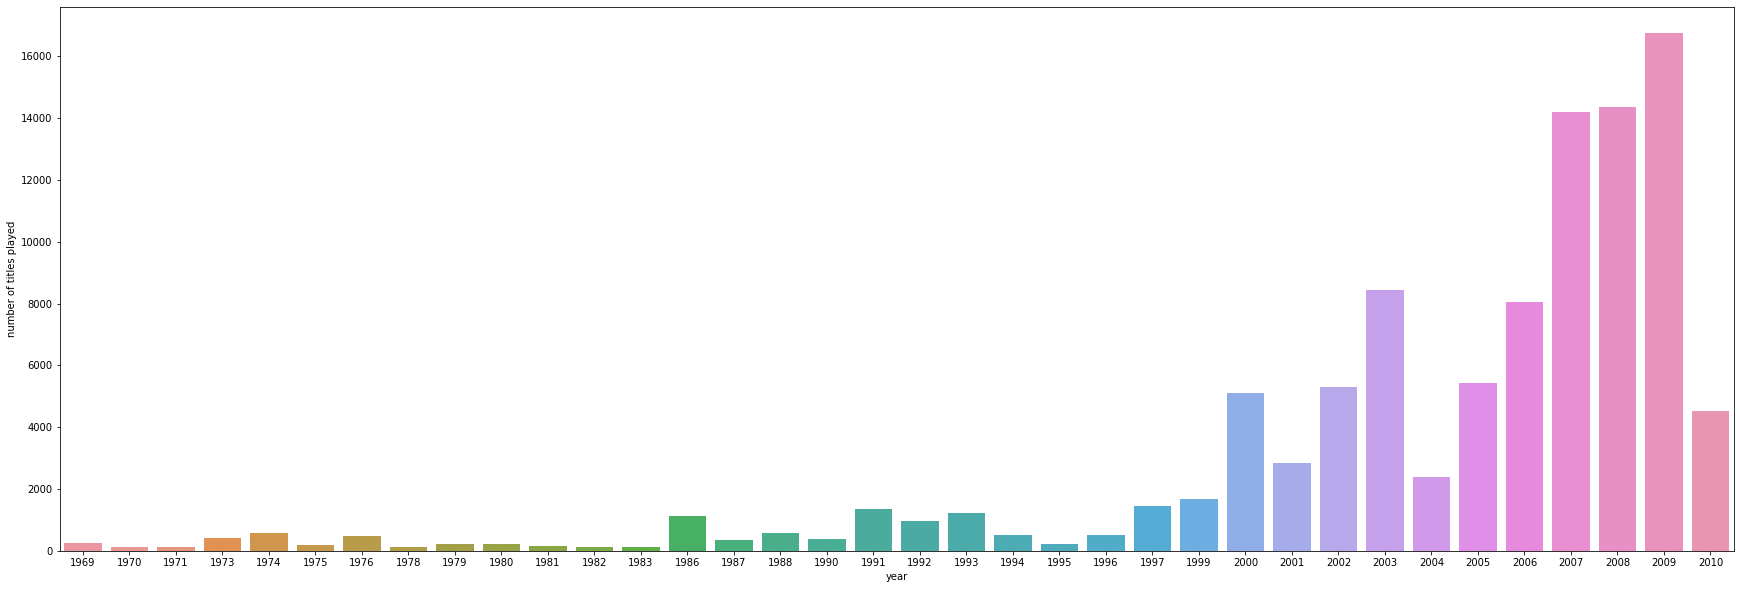

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
y = 'title',
data = count,
estimator = np.median)
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** #
 - Titles played has generally increased over the course of time from 1969-2010.
 - There seems to be a somewhat cylcical nature to the ups and downs of the number of titles played over time, with peaks around 2000, 2003, and 2009.
 - Each peak is followed by a significant drop and the a smooth rise to the next peak.   

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
- We should begin with a simple averaging method as a baseline.  Next we could try a content-based approach to tailor the model more accurately to the dataset features.  It would also be good to try a matrix estimation that uses clustering, collaborative filtering, and single value thresholding method.  As a last attempt we could combine matrix estimation and content based models to see if there is an improvement over the previous designs.<br>  
**Overall solution design** - What is the potential solution design?<br>
We must clean the data, divide it into test and train data sets, and employ the methods described above to determine which produces the most accurate predictions.  We can use gridsearch to optimize our parameters, and tune as needed to maximize performance.<br>
**Measures of success**- What are the key measures of success to compare different potential technqiues?<br>
We can measure the efficacy of these models using precision, recall, F_1 score, and RMSE. 


Now that we have explored the data, let's apply different algorithms to build recommendation systems

**Note:** Use the shorter version of the data i.e. the data after the cutoffs as used in Milestone 1.

# **The Solution Models**

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


Here we set up the two main meausures of a song's popularity, **play count average** and **play frequency**.  The first number tells us how many times a user plays the song on average - sort of like a measure of how much each user liked the song.  The second number tells us the total number of times a song is played by all users in the data set.  We need the play frequency to prevent a user that overplayed one song skewing the data toward a song that is less popular among the broader group.  

In [ ]:
#Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean().sort_values(ascending = False) #Hint: Use groupby function on the song_id column. 
print(average_count)

#Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id')['play_count'].count().sort_values(ascending = False)  #Hint: Use groupby function on the song_id column
print(play_freq)

song_id
7224    3.351852
8324    2.608247
6450    2.557692
9942    2.493421
5531    2.309410
          ...   
1659    1.305785
3534    1.302469
447     1.293706
6042    1.288000
2304    1.237179
Name: play_count, Length: 573, dtype: float64
song_id
3567    922
310     868
8582    759
352     759
2220    724
       ... 
5733    104
6450    104
990     101
4831     98
8324     97
Name: play_count, Length: 573, dtype: int64


We now create a streamlined data frame with only our average play count and play frequency as features for each song.

In [ ]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.head()

,avg_count,play_freq
song_id,,
21,1.621723,267
22,1.485075,134
52,1.735363,427
62,1.715517,116
93,1.444444,117


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
#Build the function for finding top n songs
def top_n_movies(data, n, min_interaction = 100):
    
    # Finding movies with interactions greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    # Sorting values with respect to the average count
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [ ]:
#Recommend top 10 songs using the function defined above
top10 = list(top_n_movies(final_play,10,100))
top10

[7224, 6450, 9942, 5531, 5653, 8483, 614, 2220, 657, 352]

Below is a data frame containing the top 10 songs in our set as defined by the measures above.  The are not in the top 10 order - I just pulled them out to see the song titles.

In [ ]:
songnames = df_final[df_final['song_id'].isin(top10)]
songnames.drop_duplicates(subset = ['title'], keep='last')


,user_id,song_id,play_count,title,release,artist_name,year
1965260,31269,8483,2,Video Killed The Radio Star,Friends Reunited: Music Of The Year 1979,The Buggles,1979
2055399,902,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
2063470,14050,5653,1,Transparency,Workout Holiday,White Denim,2008
2072242,12738,657,2,Luvstruck,Hard House Anthems,Southside Spinners,1999
2078717,14416,6450,2,Brave The Elements,Brave The Elements - EP,Colossal,0
2078961,44328,352,3,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,0
2084693,27101,9942,5,Greece 2000,Greece 2000,Three Drives,1997
2084759,12960,614,4,You're The One,If There Was A Way,Dwight Yoakam,1990
2084797,12960,5531,2,Secrets,Waking Up,OneRepublic,2009
2085413,71830,2220,2,Sehr kosmisch,Musik von Harmonia,Harmonia,0


After our rank-based system, we will try some collaborative filtering models. 

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [ ]:
#Install the surprise package using pip. Uncomment and run the below code to do the same. 
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633689 sha256=55843ad22fe2643f024d5d1aa5049251f3f6df800decac9e644868a7139a97c1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?
- We wil define a relevant item as a song that has a rating score (avg. play count) of 1.5 as our default threshold, but we investigate other thresholds and their significance as well.
- True positives are songs that we predicted a user to play that they actually played.
- True negatives are songs that we predicted the user would not play that they actually did not play.
- False positives are songs we predicted a user would play that they never played.
- False negatives are songs we did not predict a user to play that they actually played. 
- We will calculate RMSE, recall, precision, and F_1 score, but F_1 score will be our primary model performance evaluation metric.  This is a combination of precision and recall, which assesses the quality of our predictions and also the comprehensiveness of our predictions.

In [ ]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by chaning the threshold? What is the intuition behind using the threshold value 1.5? 

Typical threshold values for calculating precision or recall @ k can be placed at 3.5 out of 5, assuming that any recommendation above 3.5 is a relevant item and those below are not relavent.  Our model threshould being set at 1.5 is likely due to the statistics behind user play counts.  We filtered out the data for users who played songs more than 5 times in our Milestone 1 submission.  Not many of the users in the remaining data played a song more than 3 times, so setting our threshold higher would exclude much of the data.  Setting our threshold lower would include more data but could reduce the precision.  Basically the higher the threshold we choose the higher the precision, but then our recall should go down.  Lower thresholds decrease precision but should raise recall, so it is a tradeoff.  We can explore this more later.

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) #Take only "user_id","song_id", and "play_count"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42) # Take test_size=0.4

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
#Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
print('For threshold = 1:') 
print(precision_recall_at_k(sim_user_user, threshold = 1)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.1:')
print(precision_recall_at_k(sim_user_user, threshold = 1.1)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.2:')
print(precision_recall_at_k(sim_user_user, threshold = 1.2)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.3:')
print(precision_recall_at_k(sim_user_user, threshold = 1.3)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.4:')
print(precision_recall_at_k(sim_user_user, threshold = 1.4)) #Use sim_user_user model
print('----------------------------') 
print('\033[1m' + 'For threshold = 1.5:' + '\033[0m')
print(precision_recall_at_k(sim_user_user, threshold = 1.5)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.6:')
print(precision_recall_at_k(sim_user_user, threshold = 1.6)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.7:')
print(precision_recall_at_k(sim_user_user, threshold = 1.7)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.8:')
print(precision_recall_at_k(sim_user_user, threshold = 1.8)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 1.9:')
print(precision_recall_at_k(sim_user_user, threshold = 1.9)) #Use sim_user_user model
print('----------------------------') 
print('For threshold = 2.0:')
print(precision_recall_at_k(sim_user_user, threshold = 2.0)) #Use sim_user_user model
print('----------------------------') 

For threshold = 1:
RMSE: 1.0927
Precision:  1.0
Recall:  0.972
F_1 score:  0.986
None
----------------------------
For threshold = 1.1:
RMSE: 1.0927
Precision:  0.389
Recall:  0.887
F_1 score:  0.541
None
----------------------------
For threshold = 1.2:
RMSE: 1.0927
Precision:  0.389
Recall:  0.881
F_1 score:  0.54
None
----------------------------
For threshold = 1.3:
RMSE: 1.0927
Precision:  0.392
Recall:  0.853
F_1 score:  0.537
None
----------------------------
For threshold = 1.4:
RMSE: 1.0927
Precision:  0.397
Recall:  0.794
F_1 score:  0.529
None
----------------------------
For threshold = 1.5:
RMSE: 1.0927
Precision:  0.4
Recall:  0.69
F_1 score:  0.506
None
----------------------------
For threshold = 1.6:
RMSE: 1.0927
Precision:  0.402
Recall:  0.565
F_1 score:  0.47
None
----------------------------
For threshold = 1.7:
RMSE: 1.0927
Precision:  0.402
Recall:  0.433
F_1 score:  0.417
None
----------------------------
For threshold = 1.8:
RMSE: 1.0927
Precision:  0.377
Recal

**Observations and Insights:**
First we ran the baseline user-user model with different threshold values to check metric scores.  For the **given threshold value of 1.5**: 
- We found that our RMSE value is 1.0927, which measures how far our predicted values are from the actual ones.
- Our precision is 0.4, which means than only 40% of the recommended songs are relevant.
- The recall we calculated is 0.69, indicating that we recommended 69% of the relevant songs.
- Our baseline F_1 score for the user-user model is 0.506, meaning that roughly half the time our recommended songs are relevant and relevant songs are recommended.
- We can try to improve this using gridsearch to tune our parameters.

Above shows how our metrics change dramatically depending on our threshold value.  Threshold of 1 means we recommend any played song as a "relevant" item, which may be incorrect because we don't know if the user even played the entire song fore each observation or if they just clicked on it.  Play counts of greater than 1 indicate a user liked it enough to play it at least more than one time, so choosing a threshold at an average playcount greater than 1 makes more sense.  Below I will plot the play count distribution and calculate the average and median play count values.

AxesSubplot(0.125,0.125;0.775x0.755)
The number of ratings =  121904
These ratings are distributed as follows:
Counter({1: 74901, 2: 24695, 3: 11156, 4: 6109, 5: 5043})
Average rating =  1.7014207901299383
Median rating =  1.0


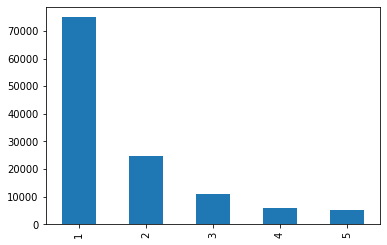

In [ ]:
from collections import Counter
import statistics

print(df_final['play_count'].value_counts().plot(kind='bar'))
play_count_distribution = df_final.copy(deep=True)
play_count_distribution = play_count_distribution.drop(labels = ['title','release','artist_name','year'], axis=1)
print('The number of ratings = ', len(play_count_distribution))
sum_counts = Counter(play_count_distribution.play_count)
print('These ratings are distributed as follows:')
print(sum_counts)
count_list = play_count_distribution['play_count'].values.tolist()
print('Average rating = ' , statistics.mean(count_list))
print('Median rating = ', statistics.median(count_list))

As we can see above, more than half of all user-item interactions involved a play count (rating) of 1.  The median play count was 1, and the average play count was 1.7, so the given threshold of 1.5 makes sense as it is in between these two values.  We will show results at several different values to evaluate our models. 

In [ ]:
#creating the user-item matrix
user_item = pd.pivot_table(df_final, values='play_count', index='user_id',
                    columns=['song_id'], fill_value=0, margins=True, aggfunc='count')
print('Our user-item matrix has 3202 rows and 573 columns, and looks like this:')
print(user_item.head(3))
num_possible_ratings = 3202 * 573
print('The number of possible user-item interactions in the user-item matrix is:', num_possible_ratings)
num_user_noplay = len(user_item.iloc[0]) -1 - user_item['All'] 
num_userplay = user_item['All']
print('Number of songs played by users:',num_userplay.sum())
print('Number of songs not played by users:', num_user_noplay.sum())
print(round(num_user_noplay.sum() / num_possible_ratings * 100,2), "% of all possible user-item interactions were not rated.")

Our user-item matrix has 3202 rows and 573 columns, and looks like this:
song_id  21  22  52  62  93  97  118  122  134  139  ...  9771  9847  9913  \
user_id                                              ...                     
11        0   0   0   0   0   0    0    0    0    0  ...     0     0     0   
17        0   0   0   0   0   0    0    0    0    0  ...     0     0     0   
57        0   0   0   0   0   0    0    0    0    0  ...     0     0     0   

song_id  9931  9939  9942  9960  9981  9989  All  
user_id                                           
11          0     0     0     0     0     0    3  
17          0     0     0     0     0     0   34  
57          0     1     0     0     0     0   25  

[3 rows x 574 columns]
The number of possible user-item interactions in the user-item matrix is: 1834746
Number of songs played by users: 243808
Number of songs not played by users: 1591511
86.74 % of all possible user-item interactions were not rated.


In [ ]:
df_final.groupby(['user_id'])['play_count'].count().sort_values(ascending = False).head()

user_id
61472    248
15733    231
37049    206
9570     190
23337    181
Name: play_count, dtype: int64

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True) #use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.83   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8291343047313775, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958,3232, verbose=True) #Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.58   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5761608396202846, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The model predicted a play count of 1.83 for a song that was actually played 2 times, which is very close.  
- The model output a default value of actual_k as 40, which was used as the number of nearest neighbors (with KNN) to train the model.
- The model predicted a play count of 1.58 for user 6958 with song id 3232.

# Now let's check the model with some other songs played by user 6958:

In [ ]:
df_final[df_final['user_id']==6958].sort_values('play_count', ascending = False).head(10)

,user_id,song_id,play_count,title,release,artist_name,year
278,6958,5566,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003
218,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
302,6958,9351,2,The Police And The Private,Live It Out,Metric,2005
256,6958,3718,2,The Penalty,The Flying Club Cup,Beirut,2007
224,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
227,6958,1787,2,Help I'm Alive,Fantasies,Metric,2009
255,6958,3551,1,You're A Cad,Ray Guns Are Not Just The Future,the bird and the bee,2009
258,6958,3801,1,Baby,Ray Guns Are Not Just The Future,the bird and the bee,2009
260,6958,3907,1,What's In The Middle,Ray Guns Are Not Just The Future,the bird and the bee,2009
271,6958,5193,1,Goodnight Bad Morning,Midnight Boom,The Kills,2008


In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.48   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.4752372392004471, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.7950099185034492, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.47   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.474641562447736, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.18   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.175, details={'actual_k': 40, 'was_impossible': False})

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.037237706082032
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch.
sim_options = {'name': 'pearson_baseline',
               'user_based': True,'min_support': 2}

# Using our optimized parameter values from above for KNN basic
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Train data on train data set
sim_user_user_optimized.fit(trainset)

# Find precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized, threshold = 1)
precision_recall_at_k(sim_user_user_optimized, threshold = 1.1)
print('------------')
precision_recall_at_k(sim_user_user_optimized, threshold = 1.5)
print('------------')
precision_recall_at_k(sim_user_user_optimized, threshold = 1.7)

RMSE: 1.0486
Precision:  1.0
Recall:  0.972
F_1 score:  0.986
RMSE: 1.0486
Precision:  0.398
Recall:  0.891
F_1 score:  0.55
------------
RMSE: 1.0486
Precision:  0.426
Recall:  0.723
F_1 score:  0.536
------------
RMSE: 1.0486
Precision:  0.429
Recall:  0.414
F_1 score:  0.421


**Observations and Insights: (threshold = 1.5)**
- We can see our RMSE is slightly improved from 1.0927 to 1.0486 in our optimized user user model.
- The precision of our model as increased from 0.40 to 0.426, which is still pretty low.  Around 43% of our recommeded songs are relevant songs.
- The recall increased from 0.69 to 0.723 in our new model, which is a significant improvement as well.  Now just over 72% of relevant songs have been recommended.
- The F_1 score for our optimized model is 0.536, which is better than our baseline model.  Most of the time relevant songs are recommended and recommeded songs are relevant.

In [ ]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.89   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8862684995790355, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
#Predict the play count for a song that is not listened by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.69   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6937190670203166, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights:**
- The predicted play count for our optimized model is even closer to the actual play count than our baseline model at 1.89 compared with 1.83.  This is extremely close.
- The model also predicted user 6958 will have a play count of 1.69 for song id 3232.

# Checking other played song predictions with optimized mode.  3 of the four predictions improved, 1 was worse.

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user_optimized.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.24   {'actual_k': 13, 'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.2396475680038674, details={'actual_k': 13, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user_optimized.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 4.62   {'actual_k': 17, 'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=4.618560561266195, details={'actual_k': 17, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user_optimized.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.64   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.6351869109556862, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user_optimized.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.04   {'actual_k': 29, 'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.0393676567287198, details={'actual_k': 29, 'was_impossible': False})

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain user?

In [ ]:
#Use inner id 0. 
sim_user_user_optimized.get_neighbors(0, k = 5)


[1815, 2627, 137, 36, 853]

Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended song ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # extracting those song ids which the user_id has not played yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the song ids which user_id has not played yet
    for item_id in non_interacted_products:
        
        # predicting the ratings for those non-played song ids by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted ratings
        recommendations.append((item_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user

In [ ]:
#Make top 10 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 10, sim_user_user_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,3357,2.610029
1,6878,2.587160
2,352,2.562473
3,952,2.538625
4,2220,2.431976
5,8494,2.417876
6,2747,2.398192
7,6270,2.392493
8,7343,2.378725
9,5531,2.361345


**Observations and Insights:**
- All of these 10 recommended songs have strong predicted play counts--all over 2.3 plays per song.
- Song id 3357 is the most highly recommended song with a predicted play count of ~2.61. 


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings',ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to make the correction in the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?
<br>* We could add this 1/np.sqrt(n) term for more optimistic predictions.  Subtracting will make our predictions more conservative.

In [ ]:
#Applying the ranking_songs function on the final_play data. 
user_user = ranking_songs(recommendations, final_play)
print(user_user)

   song_id  play_freq  predicted_ratings  corrected_ratings
8     3357        150           2.610029           2.528379
0      352        759           2.562473           2.526175
9     6878        126           2.587160           2.498073
3      952        486           2.538625           2.493264
1     2220        724           2.431976           2.394811
7     8494        157           2.417876           2.338067
4     6270        330           2.392493           2.337444
6     2747        192           2.398192           2.326023
5     7343        310           2.378725           2.321929
2     5531        627           2.361345           2.321408


**Observations and Insights:**
- The 1/np.sqrt(n) term brings the corrected ratings down slightly for all ratings. 
- Song id 3357 is still the number one recommended song with a corrected play count rating of ~2.53.
- With these corrected ratings song id 352 has taken the 2nd place from song id 6878 for recommendation based on play count.

### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item, threshold = 1)
precision_recall_at_k(sim_item_item, threshold = 1.1)
print('--------------------')
precision_recall_at_k(sim_item_item, threshold = 1.5)
print('--------------------')
precision_recall_at_k(sim_item_item, threshold = 1.7)

RMSE: 1.0411
Precision:  1.0
Recall:  0.972
F_1 score:  0.986
RMSE: 1.0411
Precision:  0.379
Recall:  0.844
F_1 score:  0.523
--------------------
RMSE: 1.0411
Precision:  0.313
Recall:  0.555
F_1 score:  0.4
--------------------
RMSE: 1.0411
Precision:  0.248
Recall:  0.39
F_1 score:  0.303


**Observations and Insights: (threshold = 1.5)**
- Our baseline item item model has an RMSE of 1.0411, which is better than our baseline user user model.
- The precision of our item item model is 0.313, meaning that less than one third of our recommended songs are relevant.
- The recall for this model is 0.55, which means only 55% of relevant songs are currently being recommended.
- The F_1 score is 0.4, which is fairly low and means that most of the time relevant songs are not recommended and recommended songs are not relevant.

In [ ]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.37   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3694539946683513, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(902, 1671, verbose = True)

user: 902        item: 1671       r_ui = None   est = 1.55   {'actual_k': 25, 'was_impossible': False}


Prediction(uid=902, iid=1671, r_ui=None, est=1.5494405027822702, details={'actual_k': 25, 'was_impossible': False})

**Observations and Insights:**
- Our item item model predicted user 6958 would have a play count of 1.37 for song id 1671, when its actual play count was 2.  This prediction is not nearly as good as the user user model.
- Model output actual_k of 20, which is less than default of 40.
- User 902 was predicted to have a play count of 1.55 for song id 1671.
- Model output actual_k of 25, which is less than default of 40.


# Checking other songs played by user 6958 with baseline item item model.

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.3847021249527387, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.44   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.4408943498244111, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.37   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.3743047553131256, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.32   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.321766795399499, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting the data
gs.fit(data)

# find best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0183164970117207
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameter [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
#Apply the best modle found in the grid search.
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized, threshold = 1)
precision_recall_at_k(sim_item_item_optimized, threshold = 1.1)
print('--------------------')
precision_recall_at_k(sim_item_item_optimized, threshold = 1.5)
print('--------------------')
precision_recall_at_k(sim_item_item_optimized, threshold = 1.7)

RMSE: 1.0325
Precision:  1.0
Recall:  0.972
F_1 score:  0.986
RMSE: 1.0325
Precision:  0.4
Recall:  0.842
F_1 score:  0.542
--------------------
RMSE: 1.0325
Precision:  0.421
Recall:  0.662
F_1 score:  0.515
--------------------
RMSE: 1.0325
Precision:  0.332
Recall:  0.298
F_1 score:  0.314


**Observations and Insights: (threshold = 1.5)**
- Our optimized item item model has the best RMSE score yet at 1.0325.
- The precision is 0.421, meaning that only ~42% of our recommendations were relevant.
- The recall is 0.662, which means that we recommended ~66% of all relevant songs.  
- The F_1 score is 0.515, which means that just over half the time relevant songs are recommended and recommended songs are relevant.
- Aside from RMSE, none of these scores are as strong as the optimized user user model.

In [ ]:
#Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.98   {'actual_k': 7, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9790187352007633, details={'actual_k': 7, 'was_impossible': False})

In [ ]:
#predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.18   {'actual_k': 6, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1811769701529506, details={'actual_k': 6, 'was_impossible': False})

**Observations and Insights:**
- The model predicted user id 6958 would have play count of 1.98 for song id 1671, which is almost excatly the same as the actual play count of 2.
- The model output actual_k of 7, meaning only 7 nearest neighbors were available to train the model.
- User 6958 was predicted to have a play count of 1.18 for song id 3232, which the user has not interacted with. 


# Checking other songs played by user 6958 with optimized item-item model.

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item_optimized.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.65   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.6544686016660273, details={'actual_k': 9, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item_optimized.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.69   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.6937190670203166, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item_optimized.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 2.22   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=2.215695830445792, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_item_item_optimized.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.05   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.0512091697193986, details={'actual_k': 10, 'was_impossible': False})

# Finding Neighbors

In [ ]:
#Find five most similar users to the user with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[115, 225, 408, 3, 535]

In [ ]:
#Making top 10 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.
recommendations = recommendations = get_recommendations(df_final, 6958, 10, sim_item_item_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,1455,2.243196
1,765,2.225086
2,334,2.191652
3,7737,2.131281
4,731,2.091626
5,6630,2.067971
6,2019,2.061922
7,9127,2.014239
8,7910,1.963895
9,4939,1.951788


In [ ]:
#Applying the ranking_songs function. 
item_item = ranking_songs(recommendations, final_play)
print(item_item)

   song_id  play_freq  predicted_ratings  corrected_ratings
4     1455        143           2.243196           2.159571
5      765        143           2.225086           2.141461
1      334        162           2.191652           2.113085
2     7737        162           2.131281           2.052714
0     2019        344           2.061922           2.008006
6      731        139           2.091626           2.006807
7     6630        137           2.067971           1.982535
9     9127        107           2.014239           1.917565
3     7910        162           1.963895           1.885328
8     4939        137           1.951788           1.866352


**Observations and Insights:**
- Recommendations for user 6958 from this optimized item item model are all different from the 10 recommended by the user user optimized model.
- User 6958 has a top recommendation from this model of song id 1455, with a  corrected play count predicted at 2.16.  
- These recommendations all have lower predicted play counts than those under the optimized user user model.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd, threshold = 1)
precision_recall_at_k(svd, threshold = 1.1)
print('--------------------')
precision_recall_at_k(svd, threshold = 1.5)
print('--------------------')
precision_recall_at_k(svd, threshold = 1.7)

RMSE: 1.0282
Precision:  1.0
Recall:  0.952
F_1 score:  0.975
RMSE: 1.0282
Precision:  0.394
Recall:  0.86
F_1 score:  0.54
--------------------
RMSE: 1.0282
Precision:  0.415
Recall:  0.631
F_1 score:  0.501
--------------------
RMSE: 1.0282
Precision:  0.409
Recall:  0.459
F_1 score:  0.433


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.42   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4236247106585833, details={'was_impossible': False})

In [ ]:
# Making prediction for user who has not listened the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.13   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1273920086416729, details={'was_impossible': False})

# Checking other songs played by user 6958 with baseline SVD model.

In [ ]:
#predicting play_count for a sample user with a listened song.
svd.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.17   {'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.1723896469411155, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.86   {'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.8571375151126408, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.3589895593741543, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.331467416364356, details={'was_impossible': False})

## Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performe 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# fitting data
gs.fit(data)
# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0119096150879772
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd_optimized, threshold = 1)
precision_recall_at_k(svd_optimized, threshold = 1.1)
print('--------------------')
precision_recall_at_k(svd_optimized, threshold = 1.5)
print('--------------------')
precision_recall_at_k(svd_optimized, threshold = 1.7)

RMSE: 1.0190
Precision:  1.0
Recall:  0.964
F_1 score:  0.982
RMSE: 1.0190
Precision:  0.395
Recall:  0.881
F_1 score:  0.545
--------------------
RMSE: 1.0190
Precision:  0.403
Recall:  0.627
F_1 score:  0.491
--------------------
RMSE: 1.0190
Precision:  0.37
Recall:  0.436
F_1 score:  0.4


**Observations and Insights: (threshold = 1.5)**
- The RMSE of this optimized SVD model is the best yet at 1.0190.
- The precision of this model is 0.403, meaning only ~40% of the recommendations are relevant.
- The recall is better at 0.627, meaning that almost 63% of relevant songs have been recommended.
- These last 2 SVD models (baseline and optimized) have not performed as strongly in precision, recall, or F_1 score as the optimized user user and optimized item item models. 
- The values of recall, precision, and F_1 score for the optimized SVD model are worse than the baseline SVD model. 

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3261688730328545, details={'was_impossible': False})

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.25   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.254003821733134, details={'was_impossible': False})

**Observations and Insights:**
- The predicted play count for song id 1671 with user 6958 was 1.33, compared to the actual play count of 2.
- The model predicted user 6958 would have a play count of 1.25 for song id 3232.

# Checking other songs played by user 6958 with optimized SVD model.

In [ ]:
#predicting play_count for a sample user with a listened song.
svd_optimized.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.32   {'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.3245089406959563, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd_optimized.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.45   {'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.450848257619486, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd_optimized.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.39   {'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.3918974001891256, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
svd_optimized.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=1.2671982135352122, details={'was_impossible': False})

In [ ]:
# Getting top 10 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df_final, 6958, 10, svd_optimized)

In [ ]:
#Ranking songs based on above recommendations
SVD = ranking_songs(svd_recommendations, final_play)
print(SVD)

   song_id  play_freq  predicted_ratings  corrected_ratings
5     7224        108           2.665220           2.568995
4     9942        152           2.229885           2.148775
6     5653        108           2.052358           1.956133
2      614        376           2.005889           1.954318
9     8324         97           2.035138           1.933604
0     1334        576           1.970600           1.928934
1     1664        391           1.951342           1.900769
3     6378        183           1.899159           1.825237
8     4831         98           1.912909           1.811894
7     6450        104           1.892161           1.794103


**Observations and Insights:**
- Song id 7224 was the most recommended song for user 6958 for the SVD model, with a corrected play count prediction of ~2.57.
- Once again, the top 10 songs recommended by this model are completely different from those recommended by the user user model, and also from those by the item item model.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score 
precision_recall_at_k(clust_baseline, threshold = 1)
precision_recall_at_k(clust_baseline, threshold = 1.1)
print('--------------------')
precision_recall_at_k(clust_baseline, threshold = 1.5)
print('--------------------')
precision_recall_at_k(clust_baseline, threshold = 1.7)

RMSE: 1.0488
Precision:  0.995
Recall:  0.882
F_1 score:  0.935
RMSE: 1.0488
Precision:  0.399
Recall:  0.802
F_1 score:  0.533
--------------------
RMSE: 1.0488
Precision:  0.398
Recall:  0.579
F_1 score:  0.472
--------------------
RMSE: 1.0488
Precision:  0.374
Recall:  0.455
F_1 score:  0.411


In [ ]:
#Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.39   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.385179791989803, details={'was_impossible': False})

In [ ]:
#Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user.
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 0.82   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=0.8193219040973247, details={'was_impossible': False})

# Checking other songs played by user 6958 with baseline clustering model.

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_baseline.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.4840142908243021, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_baseline.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.4102127300662195, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_baseline.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.23   {'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.2271789480364215, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_baseline.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 0.69   {'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=0.6942634655746505, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.059110654582765
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_tuned, threshold = 1)
precision_recall_at_k(clust_tuned, threshold = 1.1)
print('--------------------')
precision_recall_at_k(clust_tuned, threshold = 1.5)
print('--------------------')
precision_recall_at_k(clust_tuned, threshold = 1.7)

RMSE: 1.0702
Precision:  0.992
Recall:  0.868
F_1 score:  0.926
RMSE: 1.0702
Precision:  0.397
Recall:  0.787
F_1 score:  0.528
--------------------
RMSE: 1.0702
Precision:  0.391
Recall:  0.56
F_1 score:  0.46
--------------------
RMSE: 1.0702
Precision:  0.373
Recall:  0.439
F_1 score:  0.403


**Observations and Insights: (threshold = 1.5)**
- RMSE for the optimzed co-clustering model is 1.0702, which is higher than the baseline co-clustering model.
- Precision is poor at 0.391, recall is at 0.56, and F_1 score is at 0.46.  These three values are all worse than they were for the baseline co-clustering model.

In [ ]:
#Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.00   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9997906918719375, details={'was_impossible': False})

In [ ]:
#Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.18   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1844179263956494, details={'was_impossible': False})

**Observations and Insights:**
- The model predicted a play count of 1.00 for song id 1671 for user 6958, when the actual play count was 2.
- The model predicted user 6958 would play unplayed song id 3232 1.18 times.  

# Checking other songs played by user 6958 with optimized clustering model.

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_tuned.predict(6958, 5566, r_ui=5, verbose=True) #use user id 6958 and song_id 5566

user: 6958       item: 5566       r_ui = 5.00   est = 1.21   {'was_impossible': False}


Prediction(uid=6958, iid=5566, r_ui=5, est=1.2128711935585939, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_tuned.predict(6958, 1050, r_ui=5, verbose=True) #use user id 6958 and song_id 1050

user: 6958       item: 1050       r_ui = 5.00   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=1050, r_ui=5, est=1.5474275348782174, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_tuned.predict(6958, 9351, r_ui=2, verbose=True) #use user id 6958 and song_id 9351

user: 6958       item: 9351       r_ui = 2.00   est = 1.06   {'was_impossible': False}


Prediction(uid=6958, iid=9351, r_ui=2, est=1.0633477918016485, details={'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a listened song.
clust_tuned.predict(6958, 5193, r_ui=1, verbose=True) #use user id 6958 and song_id 5193

user: 6958       item: 5193       r_ui = 1.00   est = 0.73   {'was_impossible': False}


Prediction(uid=6958, iid=5193, r_ui=1, est=0.7283324588579609, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
#Getting top 10 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
#svd_recommendations = get_recommendations(df_final, 6598, 10, svd_optimized)
clustering_recommendations = get_recommendations(df_final, 6958, 10, clust_tuned)


### Correcting the play_count and Ranking the above songs

In [ ]:
#Ranking songs based on above recommendations
clustering = ranking_songs(clustering_recommendations, final_play)
print(clustering)

   song_id  play_freq  predicted_ratings  corrected_ratings
5     7224        108           3.655529           3.559304
7     6450        104           2.504402           2.406344
6     5653        108           2.488777           2.392552
8     4831         98           2.376841           2.275825
4     8483        127           2.313342           2.224606
2     9942        152           2.258085           2.176974
3     4851        146           2.157558           2.074798
9     8324         97           2.168141           2.066606
1     6222        177           2.098152           2.022988
0      473        191           2.088806           2.016449


In [ ]:
print(user_user['song_id'])
print(item_item['song_id'])
print(SVD['song_id'])
print(clustering['song_id'])

8    3357
0     352
9    6878
3     952
1    2220
7    8494
4    6270
6    2747
5    7343
2    5531
Name: song_id, dtype: int64
4    1455
5     765
1     334
2    7737
0    2019
6     731
7    6630
9    9127
3    7910
8    4939
Name: song_id, dtype: int64
5    7224
4    9942
6    5653
2     614
9    8324
0    1334
1    1664
3    6378
8    4831
7    6450
Name: song_id, dtype: int64
5    7224
7    6450
6    5653
8    4831
4    8483
2    9942
3    4851
9    8324
1    6222
0     473
Name: song_id, dtype: int64


**Observations and Insights:**
- Song id 7224 is the most recommended song for user 6958, with an expected play count of ~3.56, which is the highest predicted play count yet.
- Song id 7224 and song id 5653 were also ranked 1st and 3rd by the optimized SVD model, respectively.  Songs 9942 and 8324 were also in the top 10 for the SVD model.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small=df_final

In [ ]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [ ]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
#drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])
#Set the title column as the index
df_small = df_small.set_index('title')
# see the first 5 records of the df_small dataset
print(df_small.head())
type(df_small)

                                 user_id  song_id  play_count  \
title                                                           
Daisy And Prudence                  6958      447           1   
The Ballad of Michael Valentine     6958      512           1   
I Stand Corrected (Album)           6958      549           1   
They Might Follow You               6958      703           1   
Monkey Man                          6958      719           1   

                                                                              text  
title                                                                               
Daisy And Prudence                    Daisy And Prudence Distillation Erin McKeown  
The Ballad of Michael Valentine  The Ballad of Michael Valentine Sawdust The Ki...  
I Stand Corrected (Album)        I Stand Corrected (Album) Vampire Weekend Vamp...  
They Might Follow You                They Might Follow You Tiny Vipers Tiny Vipers  
Monkey Man                        

pandas.core.frame.DataFrame

In [ ]:
# Create the series of indices from the data
#indices = df_small.index.to_series()
indices = pd.Series(df_small.index)
print(indices[:5])
type(indices)

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object


pandas.core.series.Series

In [ ]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[420, 528, 241, 440, 355, 407, 384, 385, 386, 387]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Who Let You Go?']

**Observations and Insights:**
- All of these song id's are in the 2 hundred to 5 hundred range.  
- These songs all seem to be in the soft rock category or folk category, with at least one of them being also by the "Foo Fighters" (artist that made "Learn to Fly"), indicating our model is doing well.  

## **Conclusion and Recommendations:** 

- Please see final report.